In [ ]:
SELECT DISTINCT business_id
FROM category
WHERE category IN(
'Acai Bowls',
'Afghan',
'African',
'Alsatian',
'American (New)',
'American (Traditional)',
'Arabian',
'Argentine',
'Armenian',
'Asian Fusion',
'Bagels',
'Baguettes',
'Bakeries',
'Bangladeshi',
'Bar Crawl',
'Barbeque',
'Bars',
'Bavarian',
'Beach Bars',
'Bed & Breakfast',
'Beer Bar',
'Beer Garden',
'Beer Gardens',
'Beer Hall',
'Beer Tours',
'Belgian',
'Bistros',
'Brasseries',
'Brazilian',
'Breakfast & Brunch',
'Breweries',
'Brewpubs',
'British',
'Bubble Tea',
'Buffets',
'Bulgarian',
'Burgers',
'Burmese',
'Cafes',
'Cajun/Creole',
'Cambodian',
'Canadian (New)',
'Cantonese',
'Caribbean',
'Caterers',
'Cheesesteaks',
'Chicken Shop',
'Chicken Wings',
'Chinese',
'Chocolatiers & Shops',
'Churros',
'Cideries',
'Cigar Bars',
'Cocktail Bars',
'Coffee & Tea',
'Coffee Roasteries',
'Coffeeshops',
'Colombian',
'Comfort Food',
'Conveyor Belt Sushi',
'Creperies',
'Cuban',
'Cupcakes',
'Curry Sausage',
'Custom Cakes',
'Czech',
'Czech/Slovakian',
'Delicatessen',
'Delis',
'Desserts',
'Dim Sum',
'Diners',
'Do-It-Yourself Food',
'Dominican',
'Donuts',
'Drive-Thru Bars',
'Eastern European',
'Eastern German',
'Eatertainment',
'Egyptian',
'Empanadas',
'Ethnic Food',
'Falafel',
'Farmers Market',
'Farms',
'Fast Food',
'Filipino',
'Fischbroetchen',
'Fish & Chips',
'Flatbread',
'Fondue',
'Food',
'Food Court',
'Food Trucks',
'French',
'Fruits & Veggies',
'Gastropubs',
'Gelato',
'Georgian',
'German',
'Gluten-Free',
'Greek',
'Guamanian',
'Haitian',
'Halal',
'Hawaiian',
'Himalayan/Nepalese',
'Honduran',
'Honey',
'Hong Kong Style Cafe',
'Hookah Bars',
'Hot Dogs',
'Hot Pot',
'Hotel bar',
'Hungarian',
'Iberian',
'Ice Cream & Frozen Yogurt',
'Imported Food',
'Indian',
'Indonesian',
'International',
'Irish',
'Irish Pub',
'Italian',
'Izakaya',
'Japanese',
'Japanese Curry',
'Juice Bars & Smoothies',
'Kebab',
'Kombucha',
'Korean',
'Kosher',
'Laotian',
'Latin American',
'Lebanese',
'Live/Raw Food',
'Lounges',
'Macarons',
'Malaysian',
'Mediterranean',
'Mexican',
'Middle Eastern',
'Milkshake Bars',
'Minho',
'Modern European',
'Mongolian',
'Moroccan',
'New Mexican Cuisine',
'Nicaraguan',
'Nightlife',
'Noodles',
'Pakistani',
'Palatine',
'Pan Asian',
'Parent Cafes',
'Pasta Shops',
'Patisserie/Cake Shop',
'Persian/Iranian',
'Peruvian',
'Pita',
'Pizza',
'Poke',
'Polish',
'Pop-Up Restaurants',
'Popcorn Shops',
'Portuguese',
'Poutineries',
'Pretzels',
'Pub Food',
'Pubs',
'Puerto Rican',
'Ramen',
'Rest Stops',
'Restaurants',
'Rotisserie Chicken',
'Russian',
'Salad',
'Salvadoran',
'Sandwiches',
'Scandinavian',
'Schnitzel',
'Scottish',
'Seafood',
'Senegalese',
'Serbo Croatian',
'Shanghainese',
'Sicilian',
'Signature Cuisine',
'Singaporean',
'Slovakian',
'Smokehouse',
'Soba',
'Soul Food',
'Soup',
'South African',
'Southern',
'Spanish',
'Specialty Food',
'Sports Bars',
'Sri Lankan',
'Steakhouses',
'Sugar Shacks',
'Supper Clubs',
'Sushi Bars',
'Swabian',
'Swiss Food',
'Syrian',
'Szechuan',
'Tacos',
'Taiwanese',
'Tapas/Small Plates',
'Tea Rooms',
'Tempura',
'Teppanyaki',
'Tex-Mex',
'Thai',
'Tiki Bars',
'Tonkatsu',
'Traditional Chinese Medicine',
'Traditional Norwegian',
'Trinidadian',
'Turkish',
'Tuscan',
'Udon',
'Ukrainian',
'Vegan',
'Vegetarian',
'Venezuelan',
'Vietnamese',
'Waffles',
'Whiskey Bars',
'Wraps'
) INTO OUTFILE '/tmp/food_businesses.csv'
FIELDS TERMINATED BY ','
ENCLOSED BY '"'
LINES TERMINATED BY '\n';





In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import unicodedata as ud
from langdetect import detect
pd.options.display.max_rows = 9999
plt.style.use('dark_background')

Load the data

In [2]:
reviews = pd.read_csv('./data/review.csv',
                      usecols=['useful','text','date','stars','business_id'])
reviews.head()


,useful,date,business_id,stars,text
0,0,b'2016-05-28',b'0W4lkclzZThpx3V65bVgig',5,"b""Love the staff, love the meat, love the plac..."
1,0,b'2016-05-28',b'AEx2SYEUJmTxVVB18LlCwA',5,"b""Super simple place but amazing nonetheless. ..."
2,0,b'2016-05-28',b'VR6GpWIda3SfvPC-lg9H3w',5,"b""Small unassuming place that changes their me..."
3,0,b'2016-05-28',b'CKC0-MOWMqoeWf6s-szl8g',5,"b""Lester's is located in a beautiful neighborh..."
4,0,b'2016-05-28',b'ACFtxLv8pGrrxMm6EgjreA',4,"b""Love coming here. Yes the place always needs..."


In [3]:
def parse_bytes(field):
    """ Convert string represented in Python byte-string literal syntax into a
    decoded character string. Other field types returned unchanged.
    https://stackoverflow.com/questions/47741235/how-to-read-bytes-object-from-csv
    """
    result = field
    try:
        result = ast.literal_eval(field)
    finally:
        return result.decode('utf-8') if isinstance(result, bytes) else field

In [4]:
#cleanup
reviews['date'] = pd.to_datetime(pd.Series([date[2:-1] for date in reviews['date']]))
reviews['text'] = pd.Series([parse_bytes(t) for t in reviews['text']])
reviews['length'] = reviews['text'].apply(len)
reviews['business_id'] = pd.Series([parse_bytes(t) for t in reviews['business_id']])

In [5]:
useful_thres = 5

Add if restaurant

In [6]:
rests = pd.read_csv('./data/food_businesses.csv')
rests['isfood'] = 1
reviews = pd.merge(reviews,rests,how='left')
del rests

add the number of reviews the business has

In [13]:
reviews = pd.merge(reviews,
    (reviews.
     groupby(['business_id']).
     size().
     reset_index().
     rename(columns={0:'business_review_count'})
    ),how='left'
    )

In [14]:
reviews.head()

,useful,date,business_id,stars,text,length,isfood,business_review_count
0,0,2016-05-28,0W4lkclzZThpx3V65bVgig,5,"Love the staff, love the meat, love the place....",289,1.0,1955
1,0,2016-05-28,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...,213,1.0,84
2,0,2016-05-28,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...,502,1.0,50
3,0,2016-05-28,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...,373,1.0,70
4,0,2016-05-28,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...,523,1.0,61


# Exploration
What is the date range

In [13]:
print(reviews.agg({'date':['min','max']}))

          date
min 2004-07-22
max 2017-12-11


How many reviews each month?

In [58]:
print(
reviews.
    assign(month=reviews.date.map(lambda dt: dt.replace(day=1))).
    groupby(['month']).
    size()
)

month
2004-07-01         1
2004-09-01         1
2004-10-01         9
2004-12-01         3
2005-01-01         7
2005-02-01         1
2005-03-01        51
2005-04-01        53
2005-05-01        69
2005-06-01        26
2005-07-01        53
2005-08-01        28
2005-09-01        35
2005-10-01       202
2005-11-01       153
2005-12-01       192
2006-01-01       558
2006-02-01       314
2006-03-01       210
2006-04-01       441
2006-05-01       292
2006-06-01       327
2006-07-01       424
2006-08-01       612
2006-09-01       590
2006-10-01       598
2006-11-01       675
2006-12-01       628
2007-01-01      1227
2007-02-01      1435
2007-03-01      1911
2007-04-01      1339
2007-05-01      1506
2007-06-01      2053
2007-07-01      2225
2007-08-01      2404
2007-09-01      1991
2007-10-01      2196
2007-11-01      2606
2007-12-01      2127
2008-01-01      3322
2008-02-01      3033
2008-03-01      3485
2008-04-01      4293
2008-05-01      4128
2008-06-01      4504
2008-07-01      5194
2008-08

If we set the useful threshold to 5, how many useful reviews are there each day at the end of the period. And does the proportion change significantly over time.

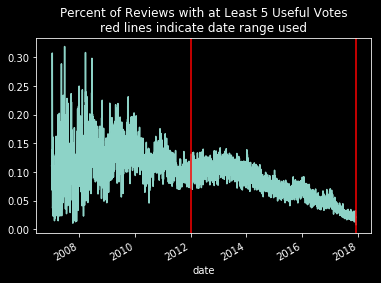

In [16]:
dt = pd.to_datetime('2007-01-01')
percentuseful=(
(reviews.loc[reviews['date'] >= dt].
 assign(isuseful = reviews.useful >= useful_thres).
 groupby(['date','isuseful']).
 size().
 reset_index().
 set_index('date').
 rename(columns={0: "count"})
).merge(
 (reviews.loc[reviews['date'] >= dt].
     assign(isuseful = reviews.useful >= useful_thres).
     groupby(['date']).
     size().
     to_frame().
     rename(columns={0:'totcount'})
 ), left_index=True,right_index=True
).assign(percent = lambda x: x['count']/x['totcount']).
query('isuseful')
)
plt.title("Percent of Reviews with at Least 5 Useful Votes"+
         "\nred lines indicate date range used")
percentuseful['percent'].plot()
plt.axvline(x=pd.to_datetime('2012-01-01'), color='r')
plt.axvline(x=pd.to_datetime('2017-12-08'), color='r')


Interestingly the portion of useful reviews declines over time (likely because there are more of them vieing for useful votes).

Dataset ends 12-11-17. Looked at distribution of percentage of overall comments with at least threshold useful votes and it declined greatly after 12-09. Therefore we removed 12-09 to 12-11 from the dataset so as to make sure comments had enough time to garner useful votes. Spans from 2004-07-01, but has fewer than 1000 comments a month until 2007. These early adopters could potentially have different standards than than current users (e.g. some could be tests from the developers to make sure things were working). Therefore we limit to 2007-01-01 through 2017-12-08.

Using the same method in http://aclweb.org/anthology/D17-1051 5 useful votes indicates that the review is collectively useful. 

Text(0.5,1,'Percent of Reviews with at Least 5 Useful Votes by Number of Stars')

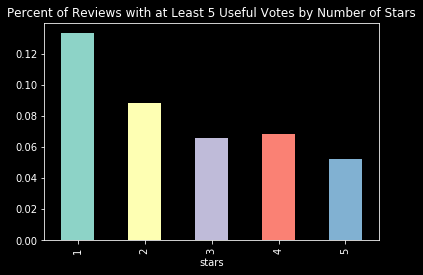

In [12]:
(reviews.
assign(isuseful=(reviews.useful >= useful_thres)*1).
groupby(['stars']).
agg({'isuseful':['size','sum','mean']}).
 loc[:,'isuseful'].
 loc[:,'mean']
).plot.bar()
plt.title("Percent of Reviews with at Least 5 Useful Votes by Number of Stars")

Some reviews are also in a different language (example below). We cut to English reviews

In [20]:
b"\xe5\xbd\xb9\xe3\x81\xab\xe7\xab\x8b\xe3\x81\xa4\xe6\x97\xa5\xe3\x81\x8c\xe6\x9d\xa5\xe3\x82\x8b\xe3\x81\x8b\xe3\x82\x8f\xe3\x81\x8b\xe3\x82\x8a\xe3\x81\xbe\xe3\x81\x9b\xe3\x82\x93\xe3\x81\x8c\xe3\x80\x81\n\xe3\x82\xa8\xe3\x83\x87\xe3\x82\xa3\xe3\x83\xb3\xe3\x83\x90\xe3\x83\xa9\xe9\xa7\x85\xe3\x81\xae\xe9\x9b\xbb\xe8\xbb\x8a\xe3\x81\xae\xe9\xa7\x85\xe3\x81\xaf\xe3\x81\x93\xe3\x81\x93\xe3\x81\xaa\xe3\x81\xae\xe3\x81\xa7\xe3\x81\x99\xe3\x81\x8c\xe3\x80\x81\n\xe3\x82\xa2\xe3\x83\x8a\xe3\x82\xa6\xe3\x83\xb3\xe3\x82\xb9\xe3\x81\xa7\xe3\x82\xa8\xe3\x83\x87\xe3\x82\xa3\xe3\x83\xb3\xe3\x83\x90\xe3\x83\xa9\xe3\x82\xa6\xe3\x82\xa7\xe3\x83\x90\xe3\x83\xaa\xe3\x83\xbc\xe3\x81\xa3\xe3\x81\xa6\xe9\xa2\xa8\xe3\x81\xab\xe8\x81\x9e\xe3\x81\x93\xe3\x81\x88\xe3\x82\x8b\xe3\x81\xae\xe3\x81\xa7\xe3\x81\x88\xe3\x81\xa3\xef\xbc\x81\xe3\x81\x93\xe3\x81\x93\xe3\x82\xa8\xe3\x83\x87\xe3\x82\xa3\xe3\x83\xb3\xe3\x83\x90\xe3\x83\xa9\xe9\xa7\x85\xe3\x81\xa7\xe3\x81\x82\xe3\x81\xa3\xe3\x81\xa6\xe3\x82\x8b\xe3\x81\xae\xe3\x81\xa8\xe4\xbd\x95\xe5\x9b\x9e\xe3\x81\x8b\xe9\xa9\x9a\xe3\x81\x8d\xe3\x81\xbe\xe3\x81\x97\xe3\x81\x9f\xe3\x80\x82\n\n\xe3\x82\xa8\xe3\x83\x87\xe3\x82\xa3\xe3\x83\xb3\xe3\x83\x90\xe3\x83\xa9\xe3\x82\xa6\xe3\x82\xa7\xe3\x83\x90\xe3\x83\xaa\xe3\x83\xbc\xe9\xa7\x85\xe3\x81\x8c\xe3\x82\xac\xe3\x82\xa4\xe3\x83\x89\xe3\x83\x96\xe3\x83\x83\xe3\x82\xaf\xe3\x81\xaa\xe3\x81\xa9\xe3\x81\xab\xe3\x81\xaf\xe3\x82\xa8\xe3\x83\x87\xe3\x82\xa3\xe3\x83\xb3\xe3\x83\x90\xe3\x83\xa9\xe9\xa7\x85\xe3\x81\xab\xe3\x81\xaa\xe3\x81\xa3\xe3\x81\xa6\xe3\x82\x8b\xe3\x81\xae\xe3\x81\xa7\xe5\xa4\xa7\xe4\xb8\x88\xe5\xa4\xab\xe3\x81\xa7\xe3\x81\x99\xe3\x80\x82\xe6\x81\x90\xe3\x82\x89\xe3\x81\x8f\xe3\x80\x82\xe8\xbf\x91\xe3\x81\x8f\xe3\x81\xae\xe3\x83\x98\xe3\x82\xa4\xe3\x83\x9e\xe3\x83\xbc\xe3\x82\xb1\xe3\x83\x83\xe3\x83\x88\xe9\xa7\x85\xe3\x81\x8b\xe3\x82\x89\xe3\x81\x93\xe3\x81\xae\xe9\xa7\x85\xe3\x81\xbe\xe3\x81\xa7\xe3\x81\xaf\xe6\xad\xa9\xe3\x81\x84\xe3\x81\xa6\xe3\x82\x82\xe6\xa5\xbd\xe3\x81\x97\xe3\x82\x81\xe3\x82\x8b\xe9\x81\x93\xe3\x81\xab\xe3\x81\xaa\xe3\x81\xa3\xe3\x81\xa6\xe3\x81\xbe\xe3\x81\x99\xe3\x82\x88\xe3\x80\x82\n\n\xe6\x81\x90\xe3\x82\x89\xe3\x81\x8f\xe3\x80\x81\xe5\xa4\x9a\xe5\x88\x86\xe3\x80\x81\xe3\x82\xa8\xe3\x83\x87\xe3\x82\xa3\xe3\x83\xb3\xe3\x83\x90\xe3\x83\xa9\xe3\x82\xa6\xe3\x82\xa7\xe3\x83\x90\xe3\x83\xaa\xe3\x83\xbc\xe9\xa7\x85\xe3\x81\x8c\xe3\x81\x82\xe3\x81\xaa\xe3\x81\x9f\xe3\x81\xae\xe3\x81\x8a\xe3\x82\x8a\xe3\x81\x9f\xe3\x81\x84\xe3\x82\xa8\xe3\x83\x87\xe3\x82\xa3\xe3\x83\xb3\xe3\x83\x90\xe3\x83\xa9\xe9\xa7\x85\xe3\x81\xa0\xe3\x81\xa8\xe6\x80\x9d\xe3\x81\x84\xe3\x81\xbe\xe3\x81\x99\xe3\x80\x82\n\n\xe5\xbf\xb5\xe3\x81\xae\xe3\x81\x9f\xe3\x82\x81\xe7\xa2\xba\xe8\xaa\x8d\xe3\x81\x97\xe3\x81\xa6\xe3\x81\x8f\xe3\x81\xa0\xe3\x81\x95\xe3\x81\x84\xe3\x81\xadw".decode('utf-8')

'役に立つ日が来るかわかりませんが、\nエディンバラ駅の電車の駅はここなのですが、\nアナウンスでエディンバラウェバリーって風に聞こえるのでえっ！ここエディンバラ駅であってるのと何回か驚きました。\n\nエディンバラウェバリー駅がガイドブックなどにはエディンバラ駅になってるので大丈夫です。恐らく。近くのヘイマーケット駅からこの駅までは歩いても楽しめる道になってますよ。\n\n恐らく、多分、エディンバラウェバリー駅があなたのおりたいエディンバラ駅だと思います。\n\n念のため確認してくださいねw'

# Cut down the data

In [15]:
# cut to date range
reviews = reviews.loc[
    (reviews.date>=pd.to_datetime('2012-01-01')) &
    (reviews.date<=pd.to_datetime('2017-12-08'))
           ].assign(isuseful=(reviews.useful >= useful_thres)*1)

In [16]:
def lang_detector(review):
    try:
        return detect(review)
    except: # if lang cant be detected, probably isnt english
        return ''

In [17]:
# cut to reviews that are english
# this takes a VERY long time
reviews = reviews.loc[reviews['text'].apply(lang_detector)=='en']

# Create Train-Test Splits

In [18]:
np.random.seed(42)

# cut useful and not into separate datasets
useful_reviews = reviews.loc[reviews.isuseful == 1]
reviews = reviews.loc[reviews.isuseful == 0]

# shuffle
useful_reviews = useful_reviews.sample(frac=1).reset_index(drop=True)
reviews = reviews.sample(frac=1).reset_index(drop=True)

# get counts for 80-20 split
num_useful = useful_reviews.shape[0]
num_useful_train = round(.8 * num_useful)

print('# useful reviews:', num_useful)
print('use',num_useful_train,'for training')

# train-test split
useful_reviews_train = useful_reviews.loc[0:num_useful_train-1]
useful_reviews_test = useful_reviews.loc[num_useful_train:]
non_useful_reviews_train = reviews.loc[0:num_useful_train-1]
non_useful_reviews_test = reviews.loc[num_useful_train:num_useful-1]
del reviews
del useful_reviews
print(non_useful_reviews_train.shape[0],'nonuseful reviews for training')

X_train = pd.concat([useful_reviews_train,non_useful_reviews_train])
del useful_reviews_train
del non_useful_reviews_train

X_test = pd.concat([useful_reviews_test,non_useful_reviews_test])
del useful_reviews_test
del non_useful_reviews_test

print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)

# useful reviews: 299492
use 239594 for training
239594 nonuseful reviews for training
X_train shape (479188, 9)
X_test shape (119796, 9)


Save the resulting data

In [19]:
X_train.to_pickle('./data/training_dat_eng_wrest_andbct.pkl')
X_test.to_pickle('./data/test_dat_eng_wrest_andbct.pkl')

In [21]:
X_train.head()

,useful,date,business_id,stars,text,length,isfood,business_review_count,isuseful
0,7,2014-10-04,A4zLP5AyKEEHQr_dWEZKig,5,"Probably the best meal I have had in Vegas, an...",1053,1.0,459,1
1,5,2013-02-04,A3h-TrSuhqvza9VL3kI4Pg,5,I love the group fitness classes! I go 3x/week...,255,NaN,46,1
2,10,2013-04-09,DsKUhQo-cQajCe01wYNDrg,5,Took my 4yr old there today. Zoya was very nic...,268,NaN,19,1
3,6,2016-03-31,w-ZGg3GKsnuVxMmiZSeryw,2,They have a wide range of exotic pets that loo...,646,NaN,87,1
4,5,2016-06-10,VF4KH9JVolOeo2XojphthQ,1,What's all the hype..? Sure it's cool to have ...,296,1.0,107,1


In [22]:
X_test.head()

,useful,date,business_id,stars,text,length,isfood,business_review_count,isuseful
239594,5,2014-12-28,teIz_4zihmAmacDR9UX3ZQ,5,I had my twins there since they were 18 months...,368,NaN,5,1
239595,6,2014-04-15,aqLR6oUVsBw6wzoEFYR5Bw,4,I test drove a visit to the Phoenix location w...,1108,NaN,204,1
239596,10,2016-01-05,5a3iXecmLFMS3PRjC-S21Q,1,TOtal scam company from top to bottom. They wi...,387,NaN,40,1
239597,14,2014-02-15,Nc6LoytSiQdnBgNywcTpDg,1,I will NEVER go back here. I wish there was a ...,1613,NaN,136,1
239598,10,2012-03-30,SwqXNCoaqhX5Oj1tKbrxkw,5,I am living in an apartment in Phoenix and hav...,672,NaN,89,1


In [25]:
(X_train.loc[X_train.isuseful==1].
 groupby(['business_review_count']).
 size().reset_index().rename(columns={0:'useful_ct'})
)

,business_review_count,0
0,2,2
1,3,4131
2,4,3055
3,5,3011
4,6,2971


In [27]:
(X_train.
groupby(['business_review_count']).
size().reset_index().rename(columns={0:'ct'}))

,business_review_count,ct
0,2,4
1,3,8392
2,4,6115
3,5,5882
4,6,5577


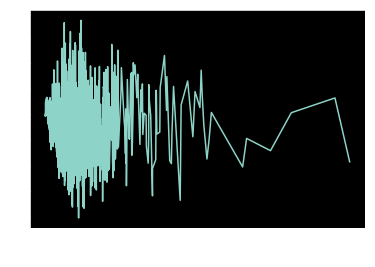

In [32]:
pd.merge(
(X_train.loc[X_train.isuseful==1].
 groupby(['business_review_count']).
 size().reset_index().rename(columns={0:'useful_ct'})
),
(X_train.
groupby(['business_review_count']).
size().reset_index().rename(columns={0:'ct'}))
).assign(p_useful=lambda x: x.useful_ct/x.ct).set_index('business_review_count')['p_useful'].plot()